<a href="https://colab.research.google.com/github/Albina1810/ML-projects/blob/master/Customer_Churn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Individual Assignment # 3  CUSTOMERS CHURN
###BAX 453 Albina Joldassova




![alt text](https://www.dunnsolutions.com/content/image/journal/article?img_id=879816&t=1549912363904)

# 1. Business **Understanding** 

There are three possible strategies those businesses can use to generate more revenue: acquire more customers, upsell existing customers, or increase customer retention.

Customer churn, customer turnover, or customer attrition, is the loss of clients or customers.
Companies use customer churn analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. 
Companies from retail and srvices sectors often have analysts  that help to  the companies to win back leaving  clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

We have a data which classified if  a customer churn or not and what attributes this customer has. Based on these attributes, we will try  to create the model which predicts if a customer  has a risk to churn in the future.

The basic layer for predicting future customer churn is data from the past. We look at data from customers that already have churned (response) and their characteristics / behaviour (predictors) before the churn happened. By fitting a statistical model that relates the predictors to the response, we will try to predict the response for existing customers. This method belongs to the supervised learning category

# **2. Data Understanding**

 **The objective** of the dataset is to  predict whether or not a customer  is about to churn. 
 
 ** Dataset source:**   https://www.kaggle.com/blastchar/telco-customer-churn
 



The raw data contains 7043 rows (customers) and 21 columns (features). The “Churn” column is our target.


Attribute Information:

* **customerID**  Customer ID

* **gender** Whether the customer is a male or a female

* **SeniorCitizen** Whether the customer is a senior citizen or not (1, 0)

* **Partner** Whether the customer has a partner or not (Yes, No)

* **Dependents** Whether the customer has dependents or not (Yes, No)

* **tenure** Number of months the customer has stayed with the company

* **PhoneService** Whether the customer has a phone service or not (Yes, No)

* **MultipleLines** Whether the customer has multiple lines or not (Yes, No, No phone service)

* **InternetService** Customer’s internet service provider (DSL, Fiber optic, No)

* **OnlineSecurity** Whether the customer has online security or not (Yes, No, No internet service)

* **OnlineBackup** Whether the customer has online backup or not (Yes, No, No internet service)

* **DeviceProtection** Whether the customer has device protection or not (Yes, No, No internet service)

* **TechSupport**  Whether the customer has tech support or not (Yes, No, No internet service)

* **StreamingTV** Whether the customer has streaming TV or not (Yes, No, No internet service)

* **StreamingMovies** Whether the customer has streaming movies or not (Yes, No, No internet service)

* **Contract** The contract term of the customer (Month-to-month, One year, Two year)

* **PaperlessBilling** Whether the customer has paperless billing or not (Yes, No)

* **PaymentMethod** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

* **MonthlyCharges** The amount charged to the customer monthly

* **TotalCharges** The total amount charged to the customer

* **ChurnWhether the customer churned or not (Yes or No)



### Data Ingest


In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import files
files.upload()

In [0]:
## read data
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
## data size: 303 rows, and 14 columns
data.shape

(7043, 21)

In [0]:
##  Data has no missing values
data.isnull().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [0]:
print ("\nUnique values :  \n",data.nunique())


Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [0]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object




### Explaratory Data Analysis



We are trying to predict if the client left the company in the previous month. Therefore we have a binary classification problem with a slightly unbalanced target:

Churn: No - 72.4%
Churn: Yes - 27.6%



From the plots above we can conclude that:

*  Recent clients are more likely to churn

* Clients with higher MonthlyCharges are also more likely to churn

* Tenure and MonthlyCharges are probably important features

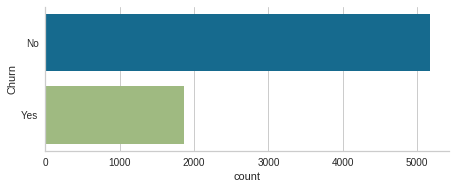

In [0]:
ax = sns.catplot(y="Churn", kind="count", data=data, height=2.6, aspect=2.5, orient='h')

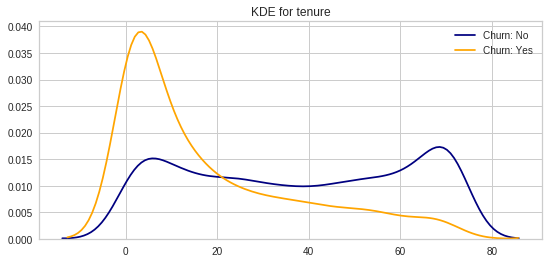

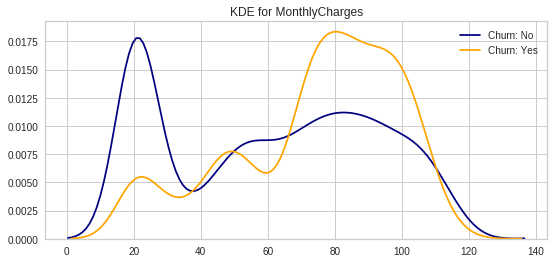

In [0]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(data[data['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(data[data['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')


# 3.Data Preparation

It's a clean, easy to understand set of data. No missing values,  no need of  data cleaning.


To prepare data for ML, we have to define independent and dependent variables, and also split the dataset into train and test sets.


We also need to convert all strings into numerical data in order to build classification model and assess correlation. As we cannot calculate anything with string values, we have to convert these values intro numeric ones.

In [0]:

#Replacing spaces with null values in total charges column
data['TotalCharges'] = data["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
data = data[data["TotalCharges"].notnull()]
data = data.reset_index()[data.columns]

#convert to float type
data["TotalCharges"] = data["TotalCharges"].astype(float)

#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    data[i]  = data[i].replace({'No internet service' : 'No'})
    


In [0]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
## drop strings type that is not necessary for the ML model
data = data.drop(["customerID"], axis = 1)

In [0]:
## undertstand categorical data
print ("\nUnique values :  \n",data.nunique())


Unique values :  
 gender                                        2
SeniorCitizen                                 2
Partner                                       2
Dependents                                    2
PhoneService                                  2
OnlineSecurity                                2
OnlineBackup                                  2
DeviceProtection                              2
TechSupport                                   2
StreamingTV                                   2
StreamingMovies                               2
PaperlessBilling                              2
Churn                                         2
MultipleLines_No                              2
MultipleLines_No phone service                2
MultipleLines_Yes                             2
InternetService_DSL                           2
InternetService_Fiber optic                   2
InternetService_No                            2
Contract_Month-to-month                       2
Contract_One year   

In [0]:
### CONVERT all categorical into NUMERICAL
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = data.nunique()[data.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in data.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_data_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")


In [0]:
data.sample(20)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
2554,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1.612573,1.687012,2.709773
4220,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1.490341,0.526921,1.437940
4473,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0.390254,-0.819317,-0.289971
2998,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,-0.220905,0.488694,-0.045332
447,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0.797694,-1.321248,-0.446945
2706,0,0,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,-0.180161,0.841043,0.139261
5264,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1.490341,-1.484126,-0.417275
482,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,-0.506113,0.553513,-0.269875
699,1,0,1,1,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1.368109,-0.049801,0.841080
4531,1,0,1,1,1,1,0,1,0,1,1,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1.408853,0.495342,1.328018


In [0]:
data.shape

(7032, 29)

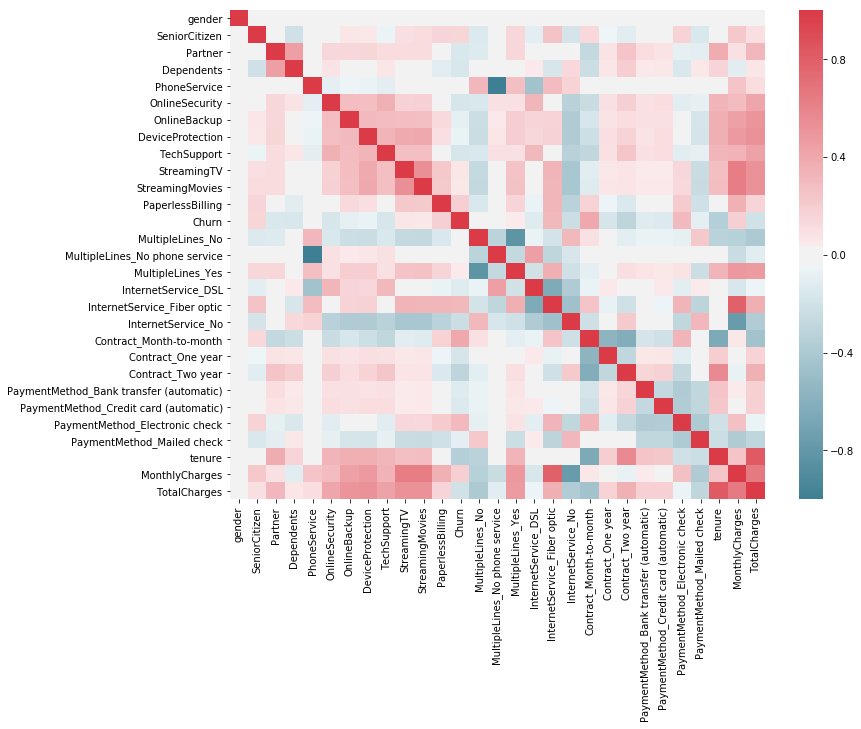

In [0]:
## CORRELATION HEAT MAP

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))

corr =data.corr()
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, cmap = cmap,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [0]:
data.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
PhoneService                                 int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
Churn                                        int64
MultipleLines_No                             int64
MultipleLines_No phone service               int64
MultipleLines_Yes                            int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No                           int64
Contract_Month-to-month        

In [0]:
## define independent(features) and dependent(target) variables
features = data.drop(['Churn'],axis=1)
target = data.Churn

## Split dataset into tarin (80%) and test (20%) sets
import sklearn
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(features,target,random_state=30,test_size=0.2)


# 4. Modeling 

In [0]:
## import ML packages
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, accuracy_score


###Logistic Regression Classifier

In [0]:
model_Log = LogisticRegression(random_state=34)
model_Log.fit(train_x,train_y)
print("Accuracy using Logistic Regression ",model_Log.score(test_x, test_y))

## the accuracy of the model  is 0.7931769722814499

Accuracy using Logistic Regression  0.7931769722814499


### SVM Calssifier

In [0]:
model_SVM = svm.SVC(C=0.8, kernel='linear', decision_function_shape='ovr')
model_SVM.fit(train_x, train_y)
print("Accuracy using SVM ",model_SVM.score(test_x, test_y))


## the accuracy of the model  is 0.7810945273631841

Accuracy using SVM  0.7810945273631841


### Random Forest Classifier

In [0]:
model_RF = RandomForestClassifier(random_state=45)
model_RF.fit(train_x,train_y)
print("Accuracy using Random Forest",model_RF.score(test_x, test_y))

#Accuracy using RandomForestClassifier  0.7775408670931059

Accuracy using Random Forest 0.7775408670931059


# GridSearchCV

In [0]:
# SVM GridSearch: we have to specify the type of Kernel for SVM. 
## It turns out that the best kernel parameter is "linear" whcih we used for SVM Classifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
parameters = {'kernel':('linear', 'rbf'), 'C':[0.8,0.9,1]}
svr = svm.SVC()
clf = GridSearchCV(svr, parameters, scoring='f1_macro', cv=5)
result = clf.fit(train_x, train_y)

In [0]:
# Result of SVM GridSearch
result_svc = pd.DataFrame(result.cv_results_)
result_svc.sort_values(by='mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,0.723328,0.013573,0.075075,0.004878,1,linear,"{'C': 1, 'kernel': 'linear'}",0.731653,0.726419,0.734195,0.714832,0.731676,0.727757,0.006938,1,0.721091,0.729981,0.728575,0.740795,0.723201,0.728729,0.006871
2,0.703143,0.009772,0.072303,0.000772,0.9,linear,"{'C': 0.9, 'kernel': 'linear'}",0.731653,0.725555,0.734195,0.712395,0.731676,0.727097,0.007880,2,0.721522,0.729981,0.728575,0.740354,0.722593,0.728605,0.006727
0,0.675459,0.023518,0.072438,0.000808,0.8,linear,"{'C': 0.8, 'kernel': 'linear'}",0.731653,0.725555,0.732645,0.712395,0.731676,0.726787,0.007621,3,0.721091,0.729981,0.727591,0.739976,0.722768,0.728281,0.006667
1,0.850106,0.009995,0.143717,0.003108,0.8,rbf,"{'C': 0.8, 'kernel': 'rbf'}",0.710961,0.708436,0.716899,0.698203,0.726116,0.712122,0.009241,4,0.714033,0.721608,0.715869,0.722295,0.712656,0.717292,0.003944
3,0.855029,0.006213,0.142443,0.001200,0.9,rbf,"{'C': 0.9, 'kernel': 'rbf'}",0.710961,0.707576,0.716899,0.697348,0.726116,0.711779,0.009571,5,0.715365,0.723828,0.716724,0.723117,0.713706,0.718548,0.004139


# 5. Models Performance Evaluation

### Logistic Regression Classifier Evaluation

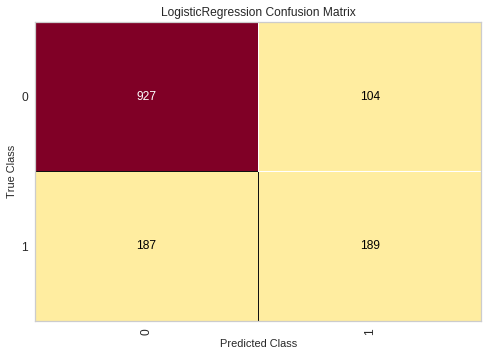

0.7931769722814499

In [0]:
## CONFUSION MATRIX
from yellowbrick.classifier import ConfusionMatrix

##Logistic Regression Classifier Confusion Matrix: the number of false positives is lower than false negatives, 
##the model fails to recognize heart disease in sick more often than it fails to classify a person with no disease as sick.
cm = ConfusionMatrix(model_Log, classes=[0,1])
cm.fit(train_x, train_y)
cm.score(test_x, test_y)
cm.poof()
cm.score(test_x,test_y)


<Figure size 576x396 with 0 Axes>

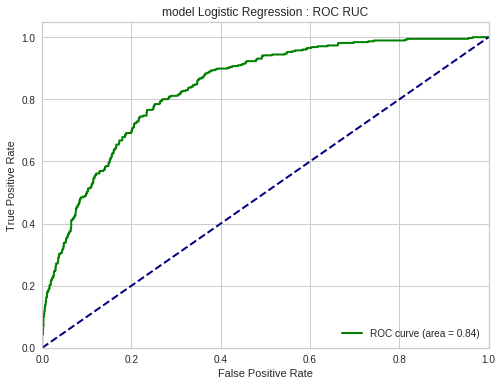

In [0]:
##ROC AUC : area under the curve is 0.84: False positive rate is small
from sklearn.metrics import roc_curve, auc
y_score = model_Log.fit(train_x, train_y).decision_function(test_x)
fpr,tpr,threshold = roc_curve(test_y, y_score)
roc_auc = auc(fpr,tpr)  
plt.figure()
lw = 2
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='green',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('model Logistic Regression : ROC RUC')
plt.legend(loc="lower right")
plt.show()

### SVM Classifier Evaluation

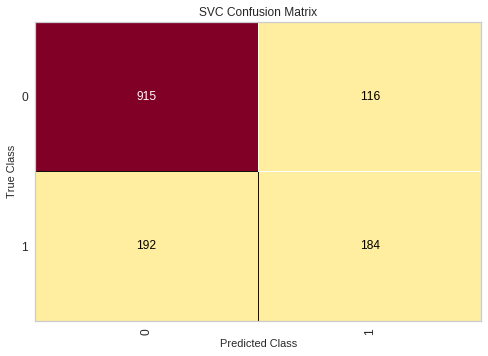

0.7810945273631841

In [0]:
##SVM Calssifier Confusion Matrix: the number of false positives and false negatives are the same
#the model fails to recognize heart disease in a sick persin and fails to classify a person with no disease as sick with the same frequency.
cm2 = ConfusionMatrix(model_SVM, classes=[0,1])
cm2.fit(train_x, train_y)
cm2.score(test_x, test_y)
cm2.poof()
cm2.score(test_x,test_y)

<Figure size 576x396 with 0 Axes>

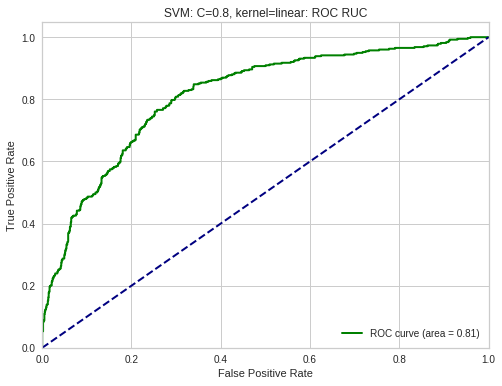

In [0]:
##ROC AUC : area under the curve is 0.81: False positive rate is small
from sklearn.metrics import roc_curve, auc
y_score = model_SVM.fit(train_x, train_y).decision_function(test_x)
fpr,tpr,threshold = roc_curve(test_y, y_score)
roc_auc = auc(fpr,tpr)  
plt.figure()
lw = 2
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='green',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM: C=0.8, kernel=linear: ROC RUC')
plt.legend(loc="lower right")
plt.show()

### Random Forest Classifier Evaluation

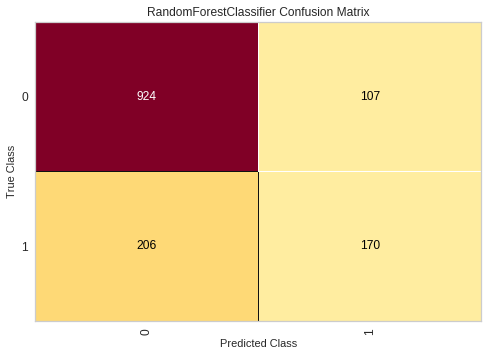

0.7775408670931059

In [0]:
##Random Forest Calssifier Confusion Matrix: the number of false positives is much lower than false negatives, 
##the model fails to recognize heart disease in sick much more often than it fails to classify a person with no disease as sick.
cm3 = ConfusionMatrix(model_RF, classes=[0,1])
cm3.fit(train_x, train_y)
cm3.score(test_x, test_y)
cm3.poof()
cm3.score(test_x,test_y)

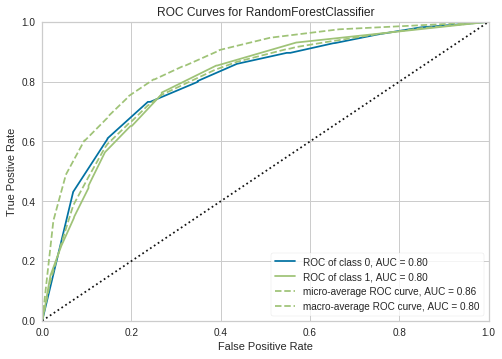

In [0]:
#ROC AUC: area under the curve is 0.86 , False positive rate is small
from yellowbrick.classifier import ROCAUC
classes=[0,1]
visualizer = ROCAUC(model_RF, classes=classes)
visualizer.score(test_x, test_y)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

#6. CONCLUSION AND DEPLOYMENT

Among  ML models, **Logistic Regression Classifier** gives  the highest **79% accuracy score**, which means that the model was correct in 79% of predictions.

**A confusion matrix** is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Logistic Regression Classifier's Confusion Matrix shows that the number of false positives is lower than false negatives, which means
the model fails to recognize heart disease in sick more often than it fails to classify a person with no disease as sick. This is someting that doctors who use the model should be aware of, and if they feel that the model's prediction run counter their intuition, they should prescribe aditional examination, as the prediction model tends to make "optimistic" for the patient predictions.

**SVM GridSearch:** helps to specify the type of Kernel for SVM.  It turned out that the best kernel parameter for SVM is **"linear"** which we used in our  SVM Classifier.

**AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve**. It is one of the most important evaluation metrics for checking any classification model’s performance. The top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This means that a larger area under the curve (AUC) is usually better. All our models have high accuracy, the Logistic Regression has the largest area under the curve(AUC), which is 84%

# Recommendation


The Management should keep an eye on customers that were classified as " churn" by the ML Model. Customer Service should approach them immediately and try to offer loyalty program. From the  analysis  above we can conclude that: Tenure and MonthlyCharges are probably important features, 

*  In order to reduce churn rate,  the Management should pay attention to newly signed customers, because Recent clients are more likely to churn

*  Clients with higher MonthlyCharges are also more likely to churn, thus, it is recomended to introduce loyalty program for the  valuable customers 

Thus, the t Loyalty program should be built in such a way that would consider tenure and monthly charge. For example, there should be a program like: 3 months free for newly signed customers.




> ![alt text](https://media.giphy.com/media/Lb3vIJjaSIQWA/giphy.gif)